In [26]:
import numpy as np
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

In [27]:
tips = sns.load_dataset("tips")

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Categorical Plot

## Countplot

Tablo grafikleri içinde yer alan bir çeşit grafik türü olan "countplot", bir değişkenin değerlerinin ne sıklıkla ortaya çıktığını görsel olarak gösterir. Countplot, seaborn kütüphanesi içinde yer alan bir fonksiyondur ve genellikle kategorik değişkenlerin sıklıklarını analiz etmek için kullanılır.

Countplot, her kategoriye ait sayıları dikey eksen üzerinde gösteren bir çubuk grafik şeklindedir. Örneğin, bir veri kümesindeki farklı cinsiyetlerin sayılarını analiz etmek istediğimizde, countplot kullanarak cinsiyet değişkeninin her kategorisine ait sayıları görsel olarak görebiliriz. Bu şekilde, farklı kategorilerin dağılımını kolayca karşılaştırabilir ve veri setindeki dengesizlikleri tespit edebiliriz.


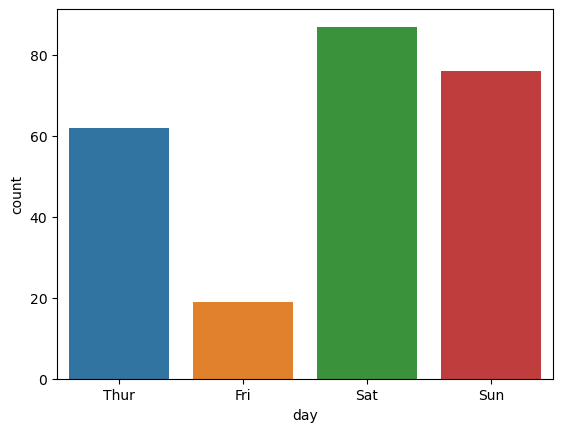

In [10]:
sns.countplot(data = tips, x ="day");

# countplot-->kategorik, barplot-->nümeric

ValueError: could not convert string to float: 'Sun'

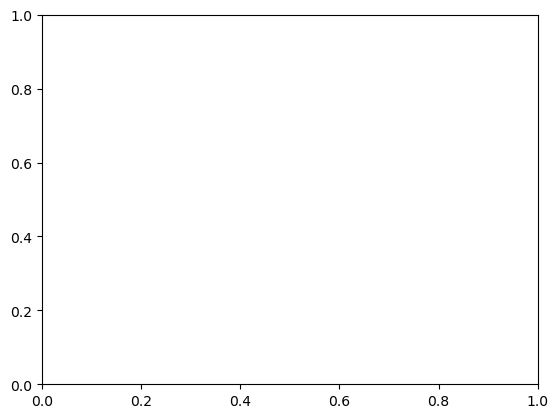

In [6]:
fig, ax = plt.subplots()

ax = sns.countplot(tips["day"])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+ 0.3));

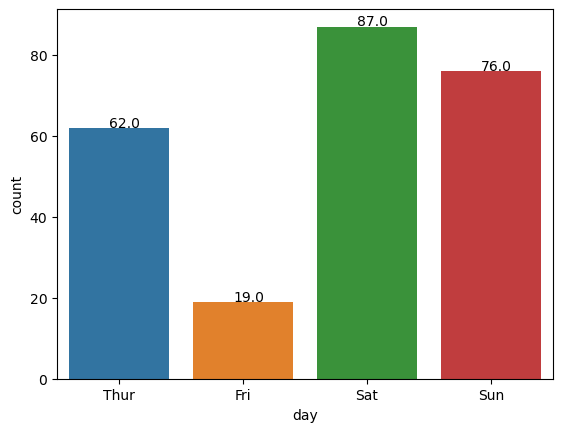

In [15]:
fig, ax = plt.subplots()

ax = sns.countplot(data = tips, x = "day")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+ 0.3));


# height +,- ile y ekdeninde bardan olan yüksekliği ayarlar
#ax.annotate fonksiyonu kullanılarak, her bir çubuğun üzerine sayı etiketleri eklenir.
#get_height ile değeri bar üzerine koyar
#p.get_x() ifadesi, çubuğun sol alt köşesinin x-koordinatını döndürür.
#"0.32" sayısı etiketinin çubuğun ortasına yerleştirilmesi için kullanılır.

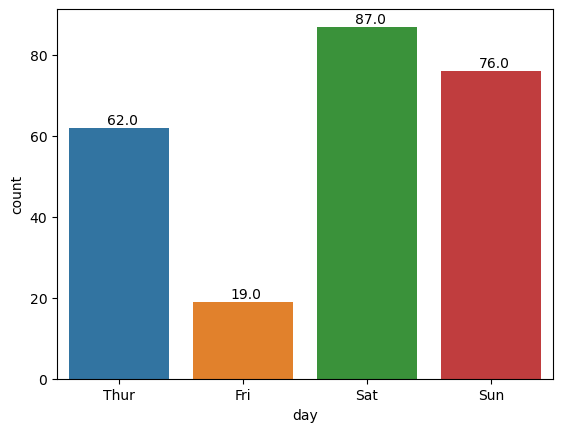

In [31]:
fig, ax = plt.subplots()

ax = sns.countplot(data = tips, x = "day")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+1));


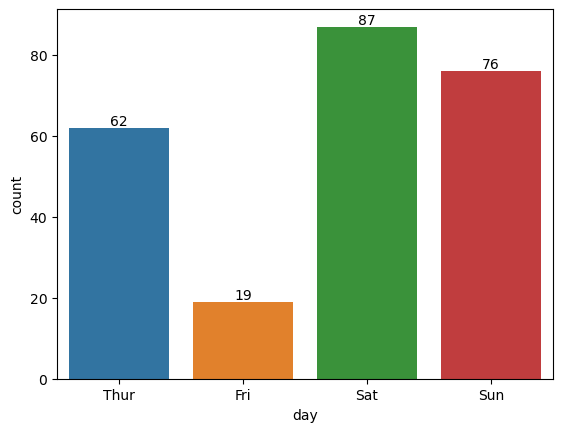

In [34]:
ax = sns.countplot(data = tips, x = "day")

ax.bar_label(ax.containers[0])
plt.show()

**ax = sns.countplot(data = tips, x = "day")
  ax.bar_label(ax.containers[0])
  plt.show()

#ax = sns.countplot(data = tips, x = "day"),"tips" veri kümesindeki "day" değişkenine göre bir "countplot" grafiği oluşturur ve bu grafiği "ax" değişkenine atar.

#ax.bar_label(ax.containers[0]),"ax" eksenindeki her bir çubuğun üzerine bir sayı etiketi ekler. 

"ax.containers[0]" ifadesi, ilk çubuk konteynerini seçer ve "bar_label" fonksiyonu, bu konteynerdeki her bir çubuğun üzerine sayı etiketi eklemek için kullanılır.

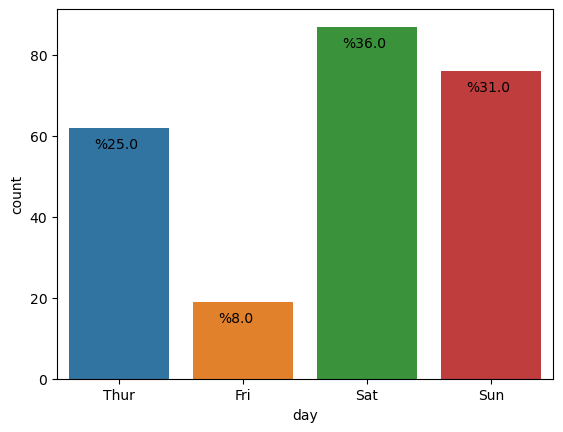

In [36]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "day", data = tips)

for p in ax.patches:
    txt = '%' + str(round((p.get_height())/ tips.day.count(), 2)*100) 
    txt_x = p.get_x() + 0.2                                             # +,- ile konumu ayarlanır 
    txt_y = p.get_height() - 5
    ax.text(txt_x,txt_y,txt)

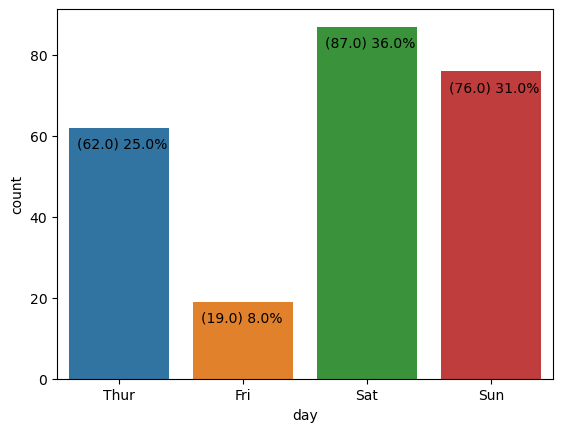

In [40]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "day", data = tips)

for p in ax.patches:
    txt = "(" + str(p.get_height()) + ")" + " " + str(round((p.get_height())/ tips.day.count(), 2)*100) + '%'
    txt_x = p.get_x() + 0.06        # +,- ile konumu ayarlanır 
    txt_y = p.get_height()-5
    ax.text(txt_x,txt_y,txt)

AttributeError: 'list' object has no attribute 'patches'

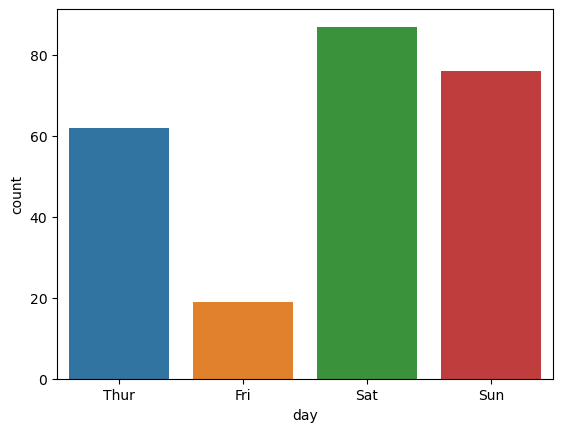

In [8]:
ax = sns.countplot(data = tips, x = "day")

ax.bar_label(ax.containers)
plt.show()

In [9]:
print(ax.patches)

<Axes.ArtistList of 4 patches>


In [12]:
sns.__version__

'0.12.2'

In [18]:
for p in ax.patches:
    print(p)
    
# grafiğin her bir çubuğunun (bar) özelliklerini görüntüler.

Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=19, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=76, angle=0)


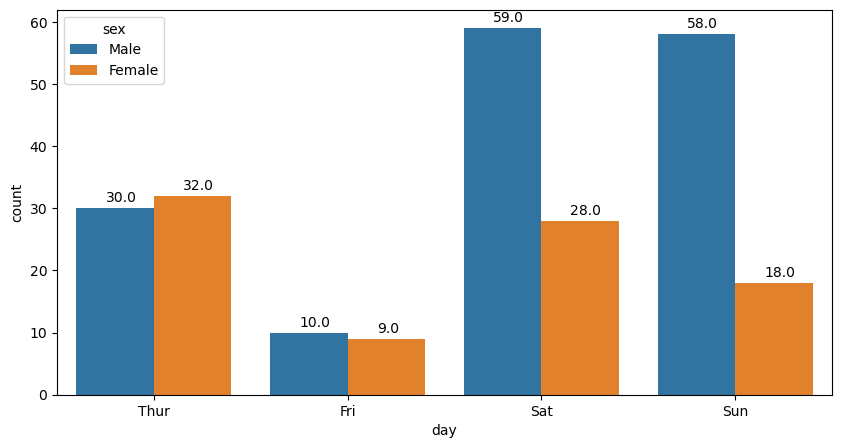

In [15]:
# addition hue

fig, ax_tip = plt.subplots(figsize = (10,5))

ax_tip = sns.countplot(data = tips, x = "day",  hue = "sex");

for p in ax_tip.patches:
    ax_tip.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1));

# sütunları ayıracağı için yan yana yazar 

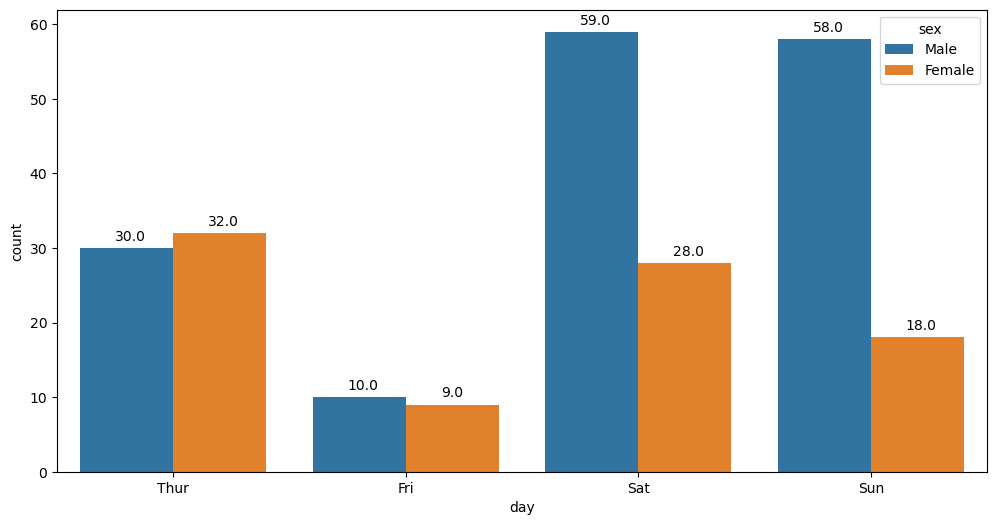

In [42]:
fig, ax_tip = plt.subplots(figsize = (12,6))

ax = sns.countplot(x = "day", data = tips, hue = "sex");

for p in ax_tip.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1));
    
# countplot kategorik değişkenlerde çalışır ve bar grafik verir.
# countplot ayrı sütun verdiği için grafiği yan yana yazar, hue nun bu işlemde etkisi yoktur.
# annotate ile üstüne yaz, p.get_height()+n ile sayının figür tepesine olan uzaklığı, p.get_x()+n yatay düzlemde

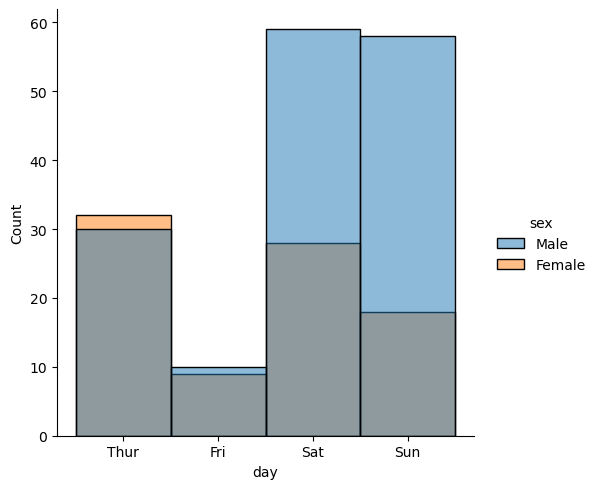

In [45]:
sns.displot(x = "day",  data = tips, hue = "sex");

# cubugu dikey bolmek icin
# hue nun grafik çıktısına etkisi yoktur. Sadece renklendirtme yapar

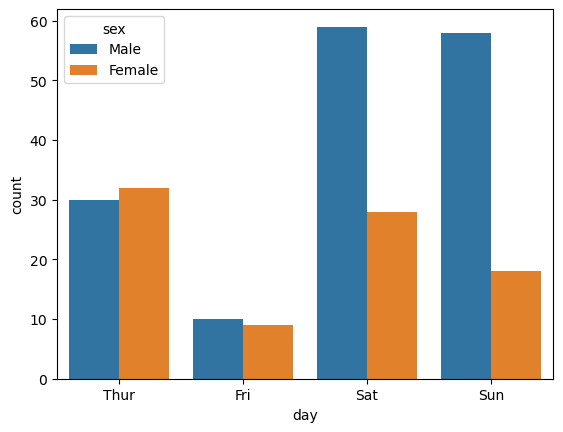

In [46]:
sns.countplot(x = "day",  data = tips, hue = "sex");

# üstteki grafikten tek farkı countplot olması

In [43]:
for p in ax.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.4, height=30, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=10, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=59, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=58, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=32, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=9, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=28, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=18, angle=0)


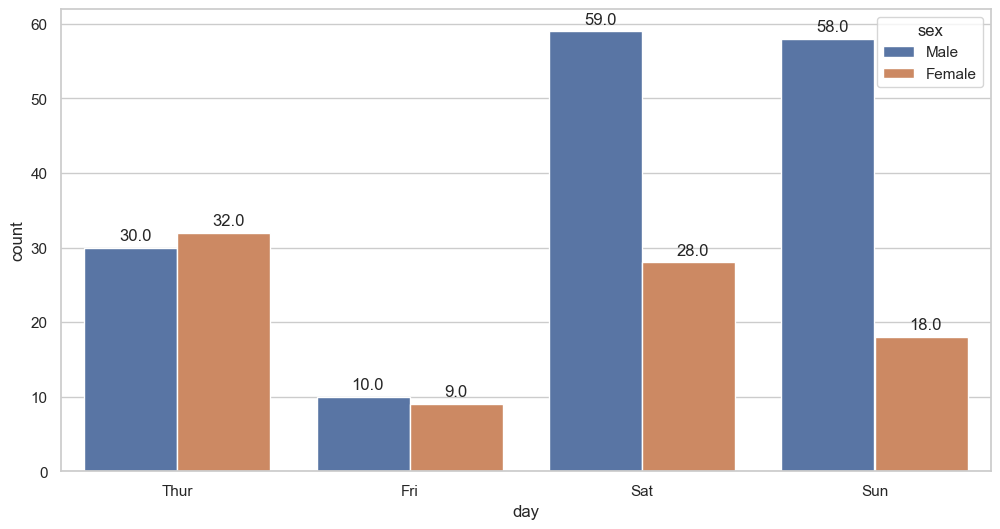

In [76]:
fig, ax_tip = plt.subplots(figsize = (12, 6))

ax_tip = sns.countplot(x = "day",  data = tips, hue = "sex");
for p in ax_tip.patches:
    ax_tip.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1));

In [77]:
tips.day.count()

244

In [79]:
round(p.get_height())

18

In [48]:
p.get_height()

18.0

In [85]:
round(p.get_height()/tips.day.count()*100,2)

7.38

In [52]:
(18/244) * 100

7.377049180327869

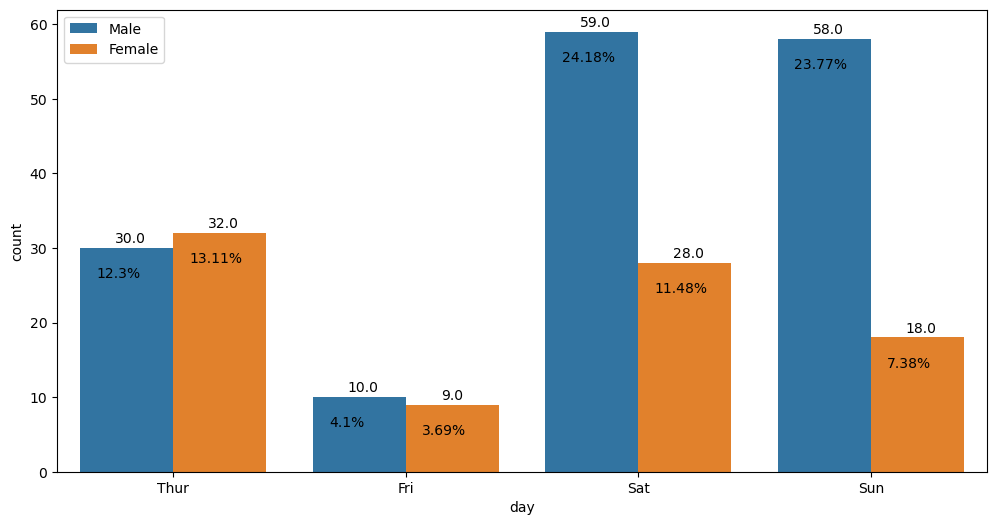

In [53]:
fig, ax = plt.subplots(figsize = (12, 6))

ax = sns.countplot(x = "day", data = tips, hue = "sex");

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+0.7))
    ax.text(p.get_x()+0.07, p.get_height()-4, str(round(p.get_height()/tips.day.count()*100, 2)) + "%")
    
plt.legend(loc = "upper left");

# p.get_height()-4 içine yazar    
# text ile yüzde oluşturuyorum
# %"+str(round(p.get_height()/tips.day.count()*100, 2))) --> ile içerisine yüzde yazıyorum, 2 virgülden sonraki 2 basamak
# yüzde yazmam için stringe çevirmem lazım. % ile str yi concat etti

# lilibet
#ax.text ile bu sefer barin icine yuzdelik degerini yazdirdim
#yuzdelik hesaplamasini yaptirdim, sonuna da 2 yazdim ki virgulden sonra 2 basamak getirsin
#roundunu aldirdim, integer cikan degeri de str'ye cevirdim, basina da % isaretini str olarak koydum.
#height'a -4 verince de barin icine yazdi bunu
    

In [17]:
print(ax.patches)

<Axes.ArtistList of 8 patches>


In [25]:
for p in ax.patches:
    print(p)
    
# Rectangle konumlarını verdi

Rectangle(xy=(-0.4, 0), width=0.4, height=30, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=10, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=59, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=58, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=32, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=9, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=28, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=18, angle=0)


In [54]:
mpg = sns.load_dataset("mpg")

In [55]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


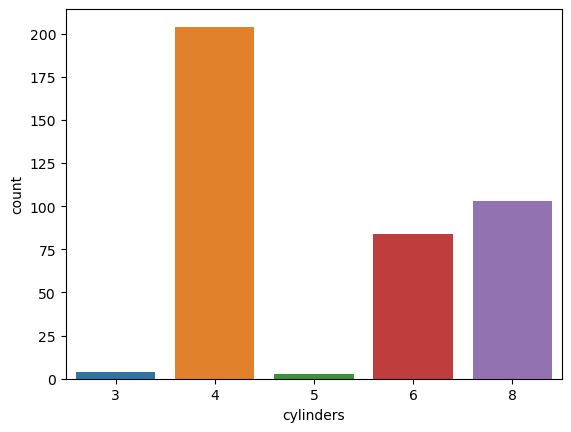

In [56]:
sns.countplot(x = "cylinders", data = mpg);

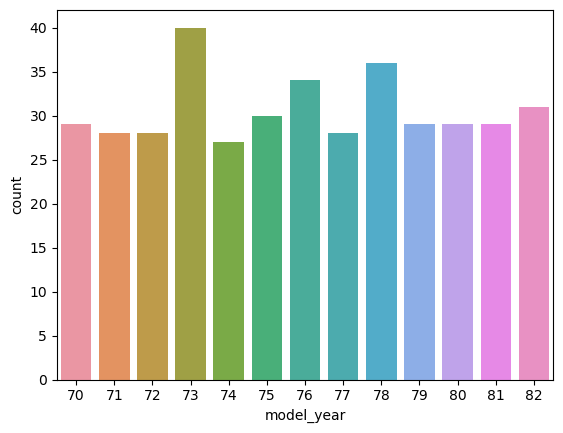

In [57]:
sns.countplot(x = "model_year", data = mpg);

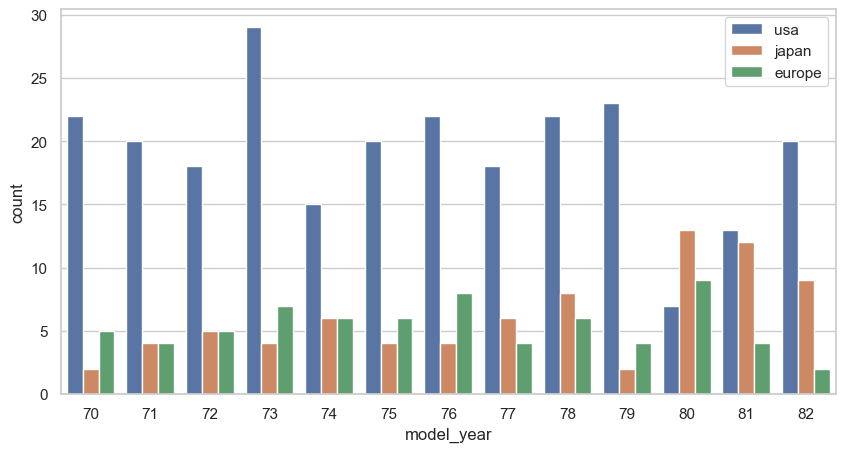

In [58]:
plt.figure(figsize = (10,5))

sns.set(style = "whitegrid")

sns.countplot(x = "model_year", hue = "origin", data= mpg)

plt.legend(loc = "upper right");


-1980 yılından itibaren Japon arabalarının Amerika piyasasına girişinde ciddi artışlar görülmektedir.

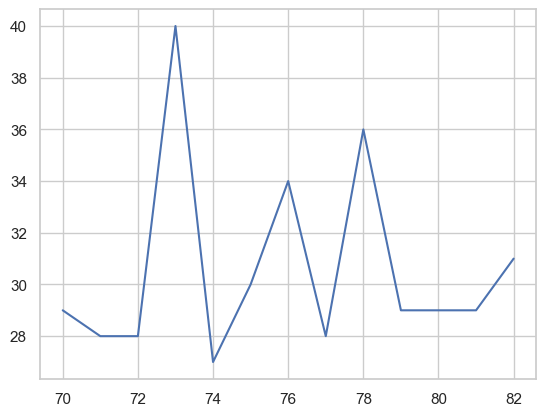

In [79]:
sns.lineplot(x = mpg.model_year.value_counts().index, y = mpg.model_year.value_counts().values);

-1974 ve 1977 deki dususlerin nedeni, 1973 ve 1977 petrol krizleridir. (73 krizinin etkisi 74 yılında görülmeye başlandı)

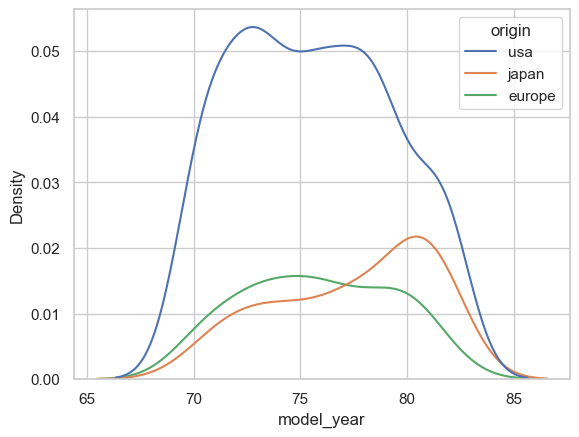

In [76]:
sns.kdeplot(x = "model_year", data = mpg, hue = "origin");

In [59]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


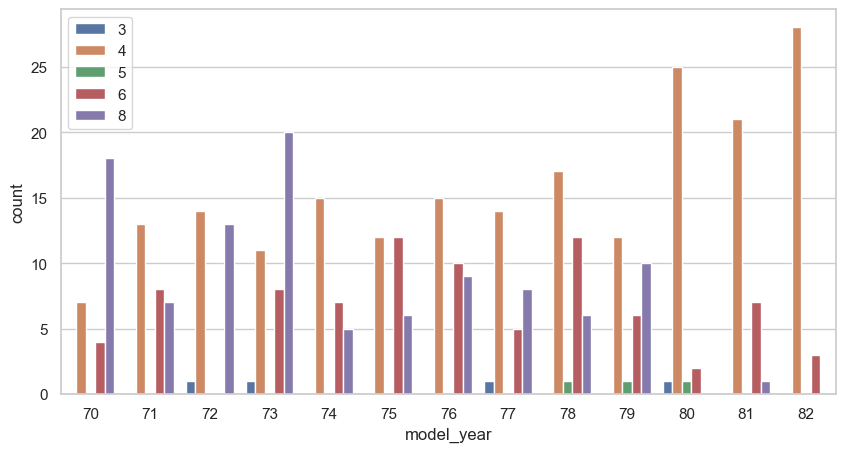

In [61]:
plt.figure(figsize = (10,5))

sns.countplot(x = "model_year", hue = "cylinders", data= mpg)

plt.legend(loc = "best");

-1973 yılında 8 silindir araç sayısı 1974 yılında keskin olarak düşüyor. Bu durumun sebebini 73 yılındaki küresel petrol krizi ile açıklayabiliriz. 

-1980 yılından itibaren 8 silindirli araçlardaki düşüüşün sebebini, Amerika kıtasındakikrize ve Japon arabalarının Amerika piyasasına girmesiyle açıklayabiliriz.


## Bar Plot

In [80]:
# istatistik ve machine learnig te tekrar görecez 

# çubuklar güven aralığını gösterir
# güven aralığı = confidance interval
# ci = confidance interval (güven aralığı %95) % 5 hata yapabiliriz (bardagin dolu tarafi)
# Confidence interval, bir istatistiksel örneklemleme yöntemi ile hesaplanan bir parametrenin, 
# genel popülasyonun tamamındaki gerçek değerinin belirli bir güven düzeyi ile yer aldığı aralığı ifade eder.
# barajların yüzde 70 i boş ya da yüzde 30 u dolu --> algı ile ilgili
# standart sapması düşük olan modeller daha başarılıdır ve güven aralığı daha yüksektir.
# çizgi ne kadar uzunsa standart sapma o kadar yüksek, modelin başarısı da o kadar düşüktür. 

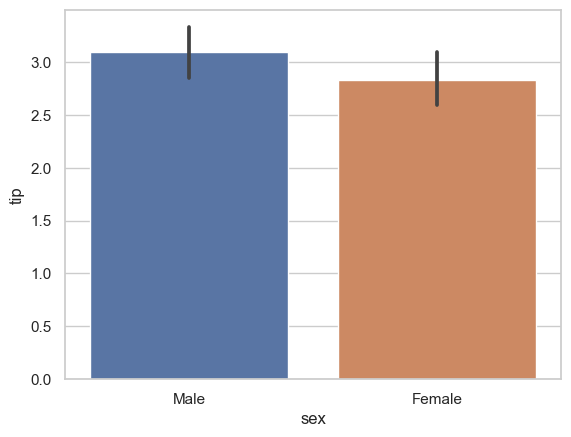

In [81]:
sns.barplot(data = tips , x = "sex", y = "tip");

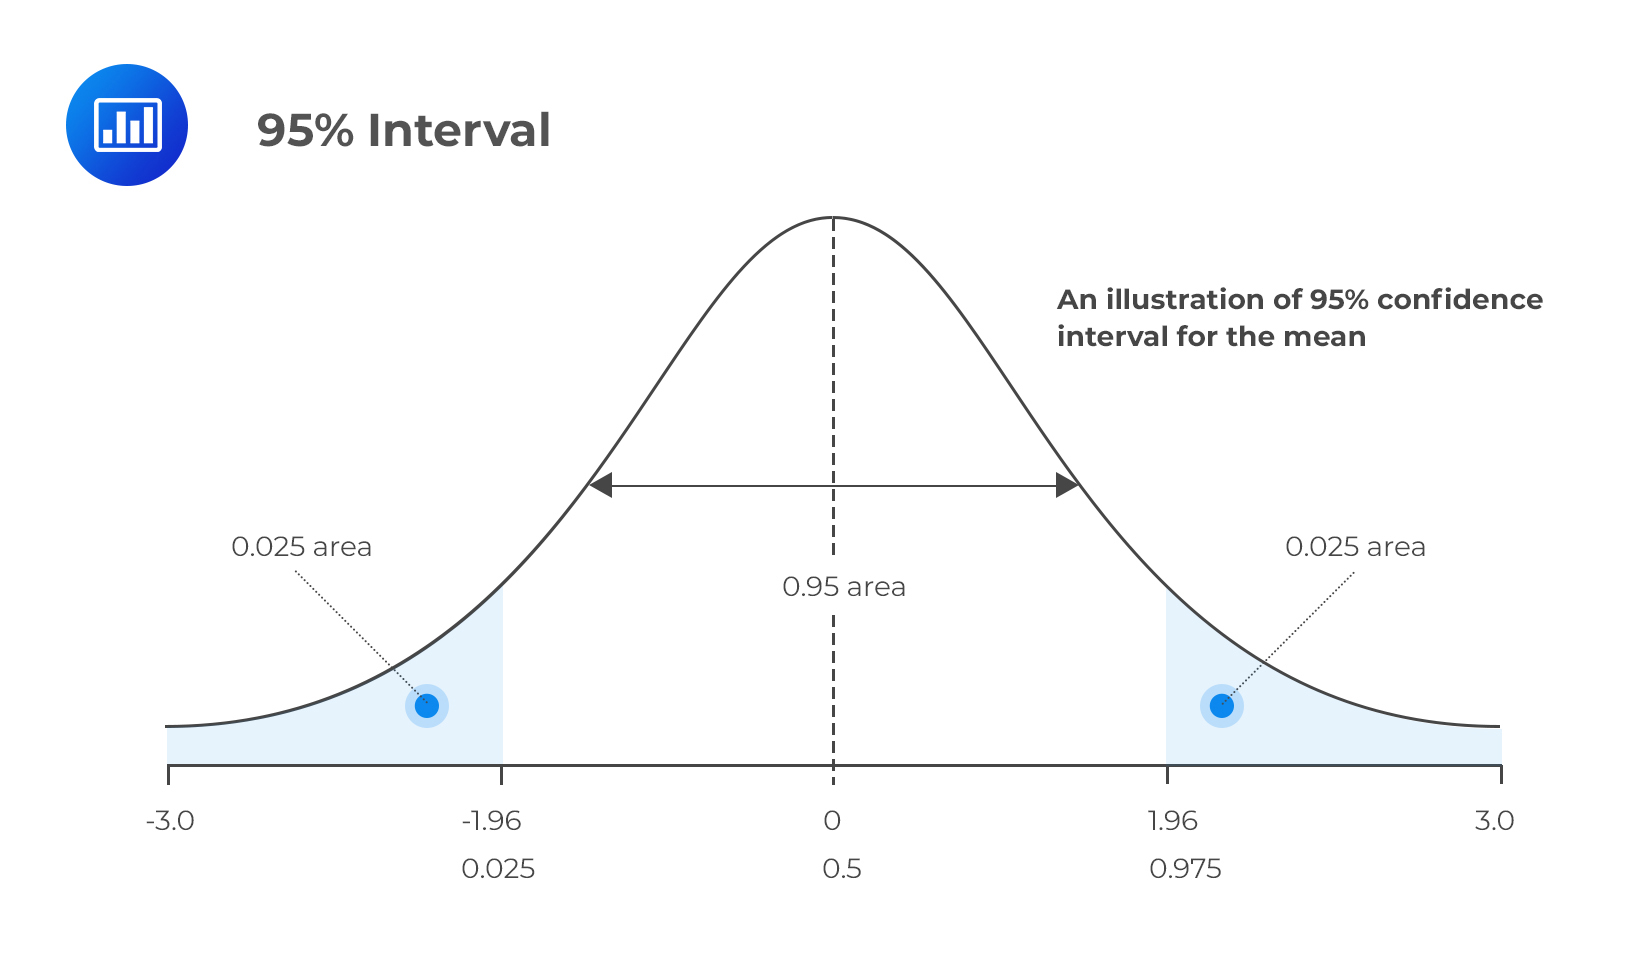

% 95 güven aralığı; aynı populasyondan(evren) faklı örneklemler seçerek birçok kere tekrarlarsam çalışmamı, bunlardan % 95 ile aynı sonucu alacam. 5000 kişi ile 45 milyonu temsil edebilirsin.

In [38]:
# add sum() estimator

sns.barplot("sex", "tip", data = tips, estimator = np.sum);

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

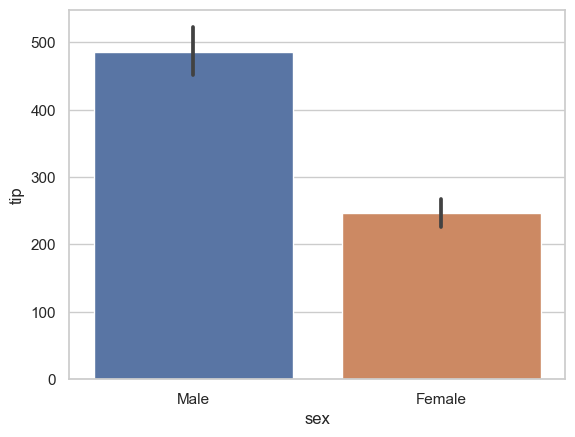

In [25]:
# add sum() estimator

sns.barplot(x = "sex", y = "tip", data=tips, estimator=np.sum);

# çubuk hata arttıkça artar, azaldıkça küçülür

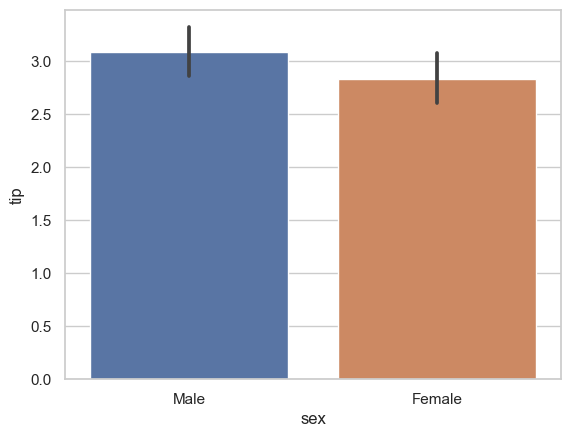

In [42]:
sns.barplot(x="sex", y="tip", data=tips, estimator=np.mean);

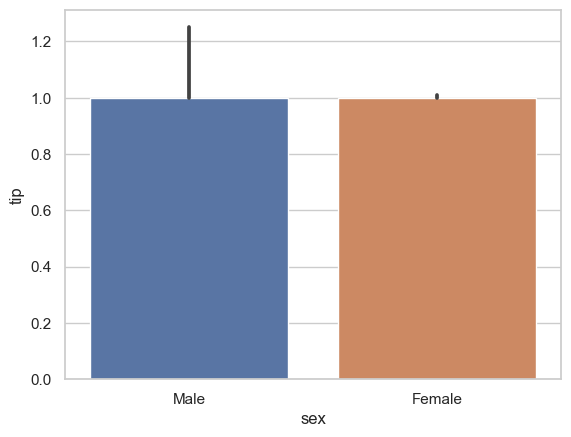

In [43]:
sns.barplot(x="sex", y="tip", data=tips, estimator=np.min);

C:\Users\maaks\AppData\Local\Temp\ipykernel_31184\1828039942.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="sex", y="tip", data=tips, estimator=np.mean, ci = "sd");


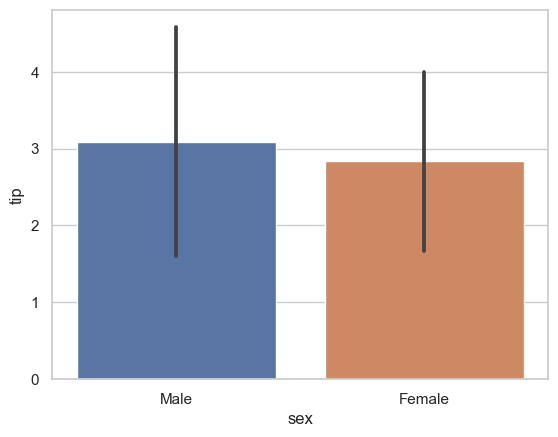

In [82]:
sns.barplot(x="sex", y="tip", data=tips, estimator=np.mean, ci = "sd");

# bu grafikte standart sapma büyük, farklılık oranı büyük. 
# cizginin uzun olmasi standart sapmanin ortalamadan o kadar uzakta oldugunu gosterir
#düşük standart sapma daha düşük fark olduğunu gösterir,model tahmin sonuçları daha güvenilirdir. Gözlemler ortalamaya yakındır

-Tip vermede erkeklerdeki standart sapma (oynaklık, değişim) kadınlardakinden daha fazladır. Kadınlar ortalama civarında tip vermişler.

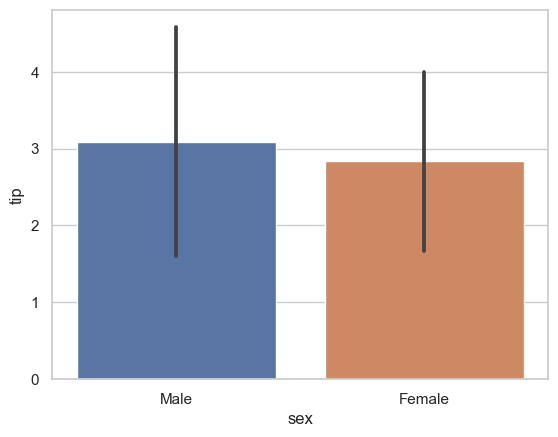

In [26]:
sns.barplot(x="sex", y="tip", data=tips, estimator=np.mean, errorbar = "sd");

# yeni versiyonda errorbar = "sd" kullanıyoruz

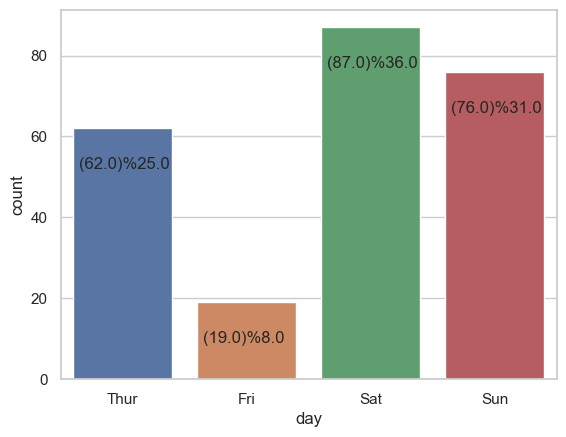

In [85]:
fig, ax = plt.subplots()

ax = sns.countplot(x = "day", data = tips)
for p in ax.patches:
    ax.annotate("("+str(p.get_height())+")" +
                "%" + str(round((p.get_height())/ tips.day.count(), 2)*100), (p.get_x() + 0.05, p.get_height()-10));

## Bar and Count Plots

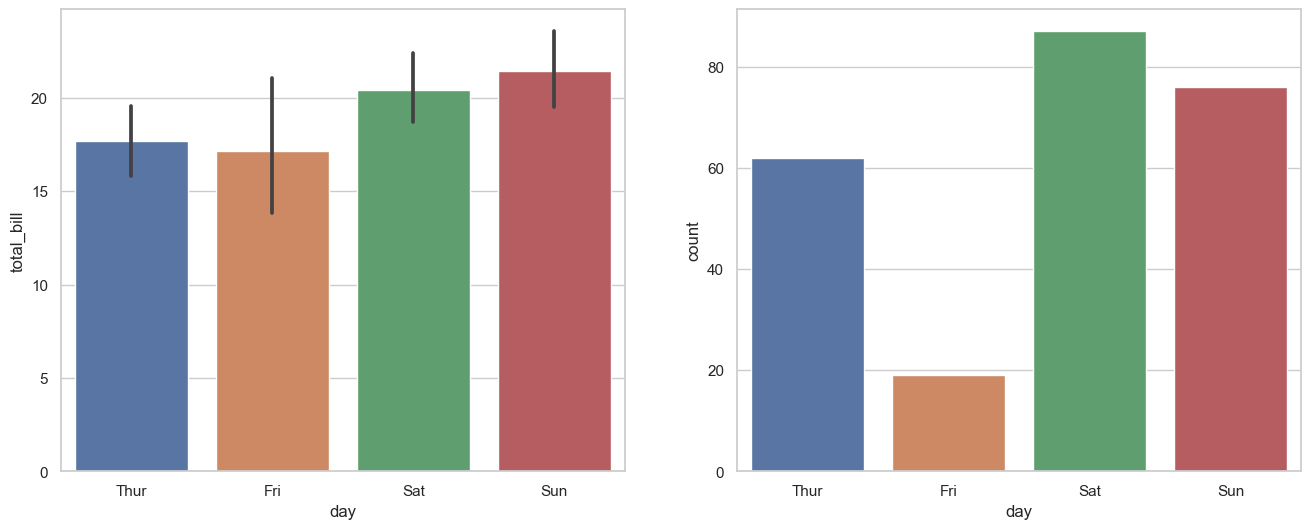

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6)) 

ax[0] = sns.barplot(x = "day", y = "total_bill", data = tips, ax = ax[0])
ax[1] = sns.countplot(x = "day", data = tips, ax = ax[1]);


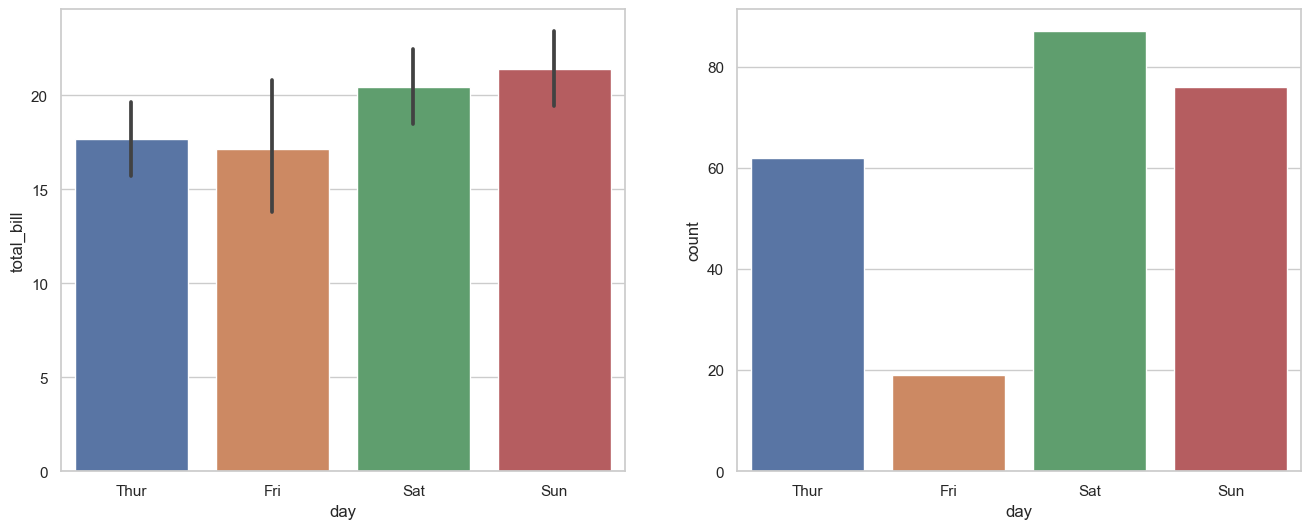

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

ax[0] = sns.barplot(x = "day", y = "total_bill", data = tips, ax= ax[0])
ax[1] = sns.countplot(x = "day", data = tips, ax= ax[1]);

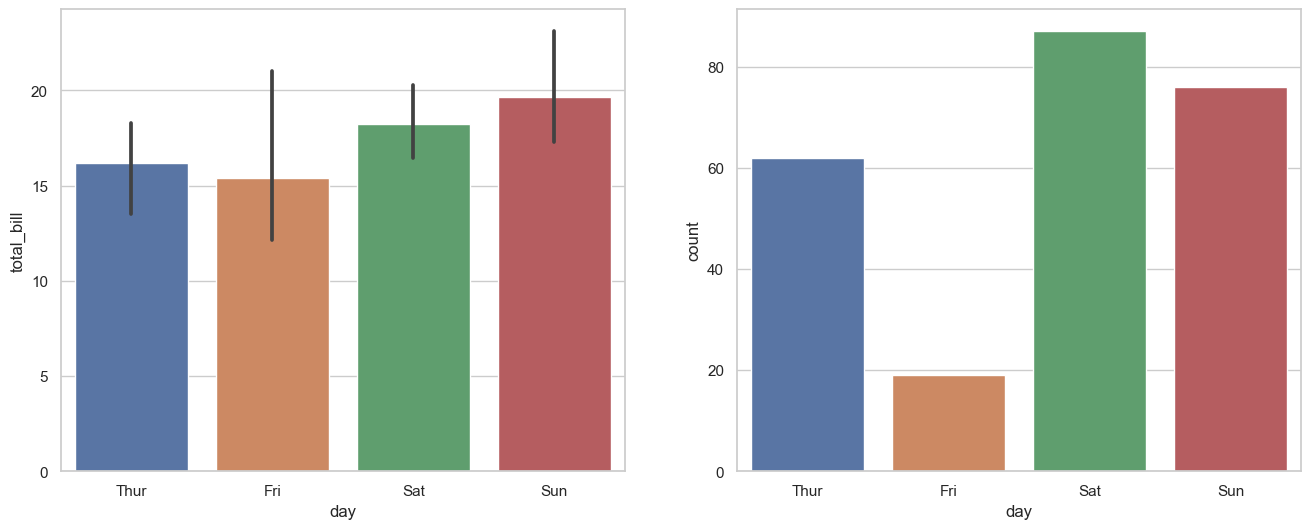

In [87]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax[0] = sns.barplot(x = "day", y = "total_bill", data = tips, estimator = np.median, ax= ax[0])
ax[1] = sns.countplot(x = "day", data = tips, ax= ax[1]);

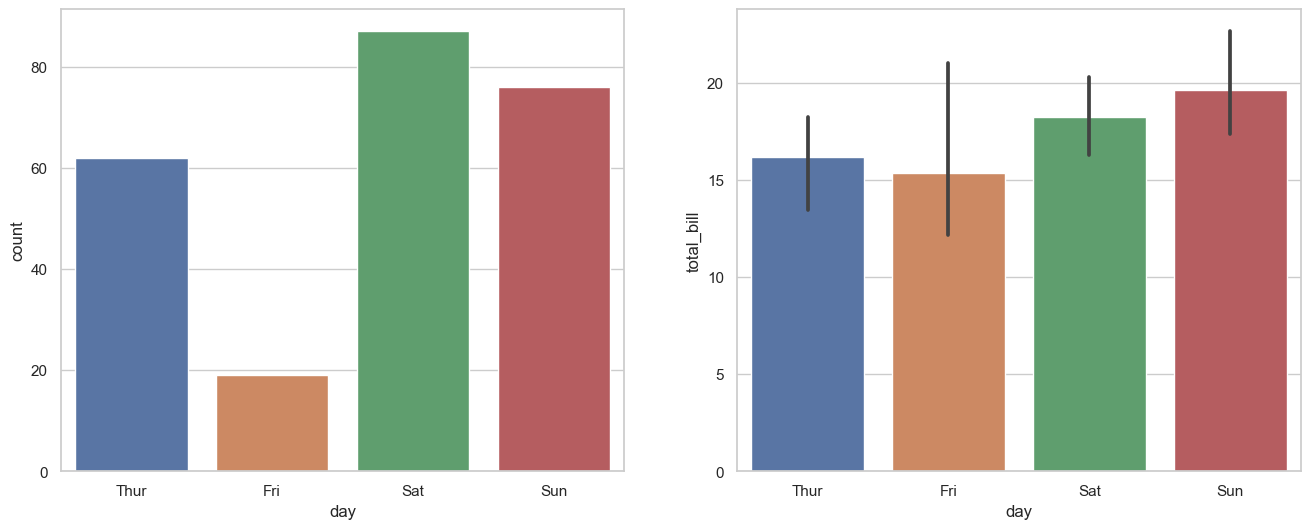

In [88]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

sns.barplot(x = "day", y = "total_bill", data = tips, estimator = np.median, ax= ax[1])
sns.countplot(x = "day", data = tips, ax= ax[0]);

-Pazar günü gelen kişi sayısı daha az olmasına rağmen ödenen fatura tutarları daha fazla gerçekleşmiş. 

-pazar günü gelenlerin harcaması daha yüksek gerçekleşmiştir.

Değişken ataması yapmayınca, grafiklerin konumlarını istediğim gibi değiştirebiliyorum.

Değişken ataması yaptığım durumlarda hata alıyorum.

TypeError: 'Axes' object is not subscriptable

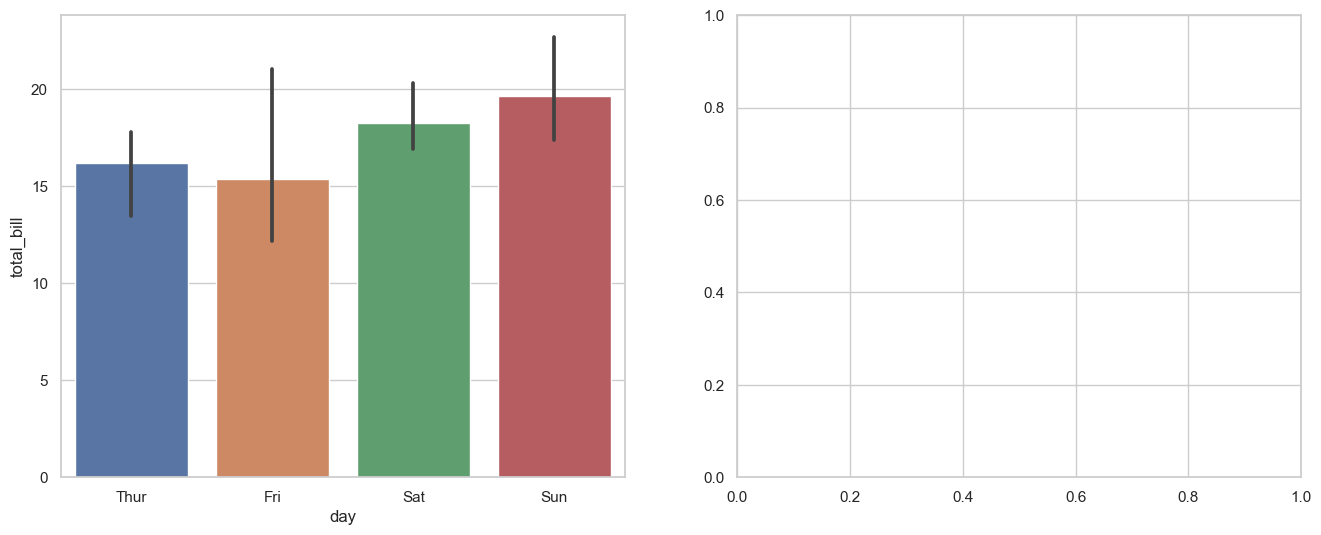

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax = sns.barplot(x = "day", y = "total_bill", data = tips, estimator = np.median, ax= ax[0])
ax = sns.countplot(x = "day", data = tips, ax= ax[1]);

## Box Plot

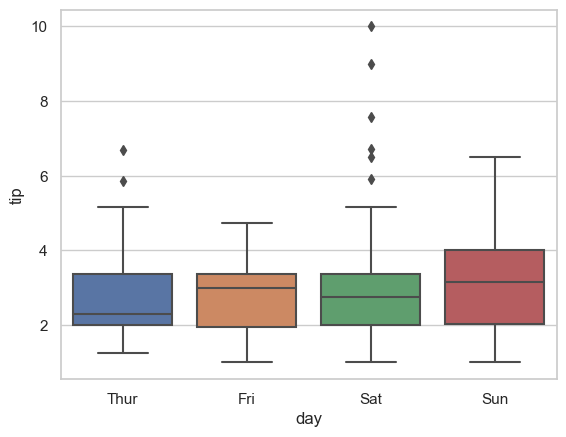

In [89]:
sns.boxplot(x = "day", y = "tip", data = tips);

# outlayer için görsel olarak en uygun görsel boxplot

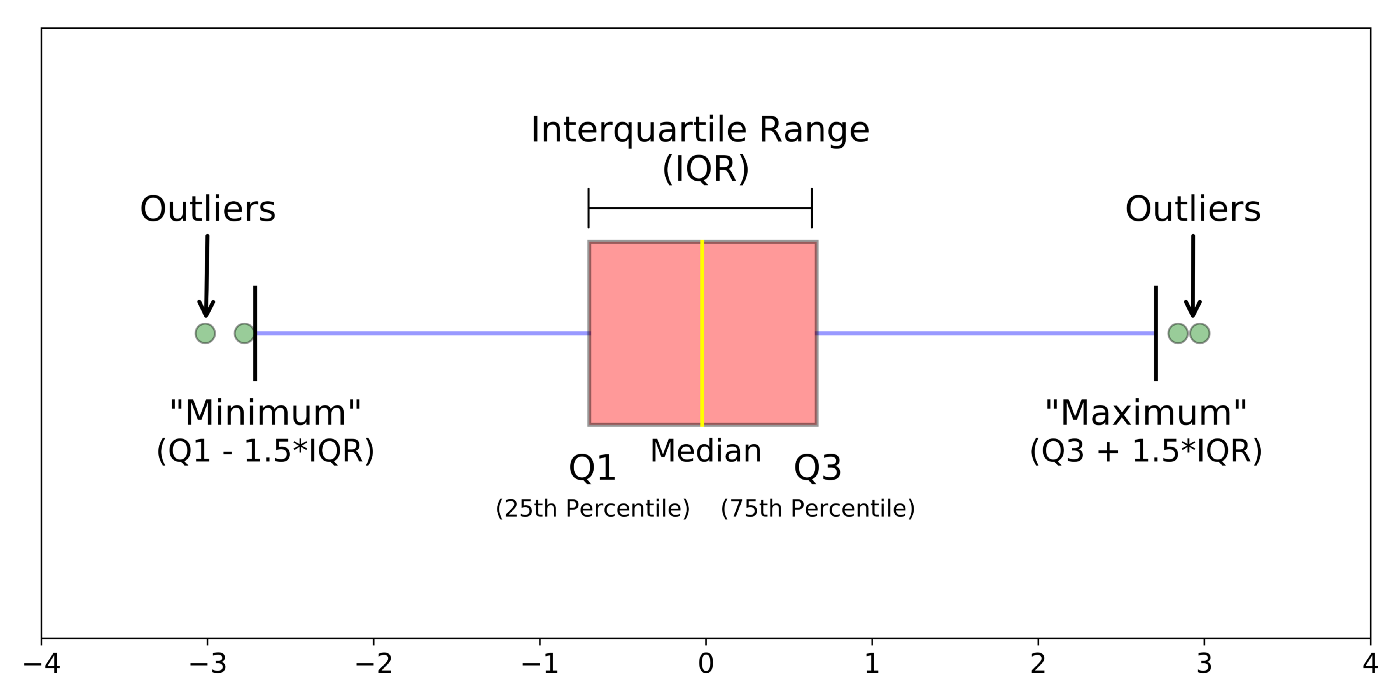

In [90]:
# Q2 medyanı temsil eder yani verinin ortasındaki sayı
# Q1, verinin başındaki sayısı ile medyan arasında kalan orta yer 
# Q3, verinin sondaki sayısı ile medyan arasında kalan orta yer
# IQR = Q3 - Q1
# outlier_step = IQR * 1.5

In [ ]:
# mod, medyan, mean, aynı çizgide ise simetrik


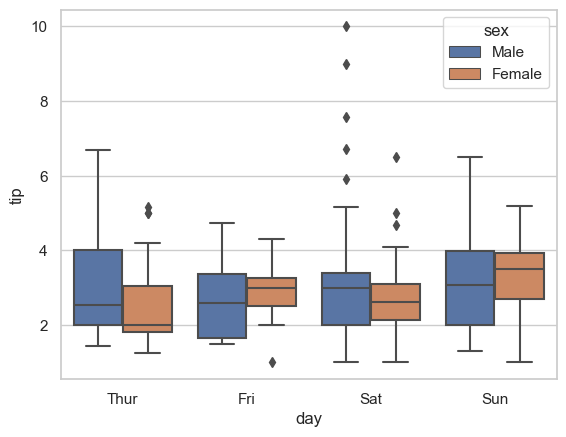

In [53]:
sns.boxplot(x = "day", y = "tip", data = tips, hue = "sex");

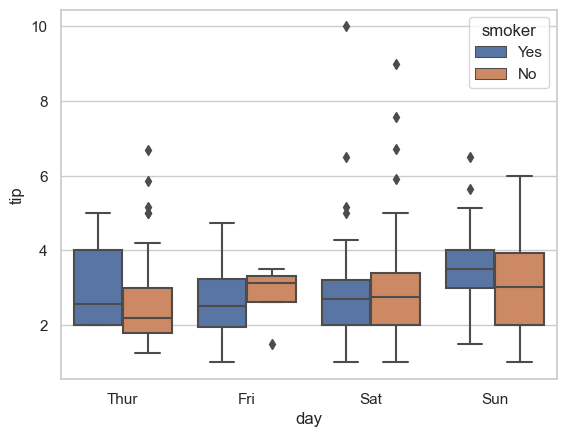

In [54]:
sns.boxplot(x = "day", y = "tip", data = tips, hue = "smoker");

# içmeyenler daha fazla bahşiş veriyor

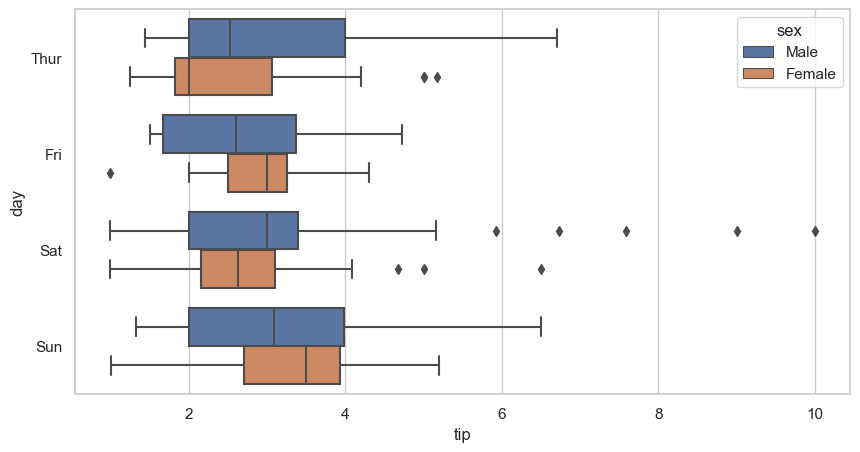

In [55]:
plt.subplots(figsize = (10,5))

sns.boxplot(x = "tip", y = "day", data = tips, hue = "sex");

## violin plot

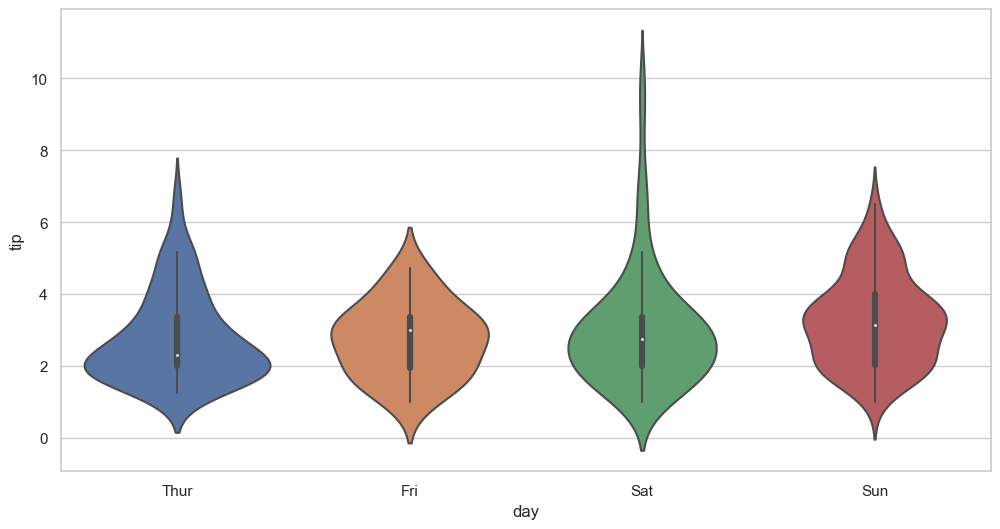

In [56]:
plt.subplots(figsize = (12,6))

sns.violinplot(x = "day", y = "tip", data = tips);
# violinplot ile box plot arasinda anlam bakimindan cok bir fark yok violinplottan yorum cikarmak daha kolay

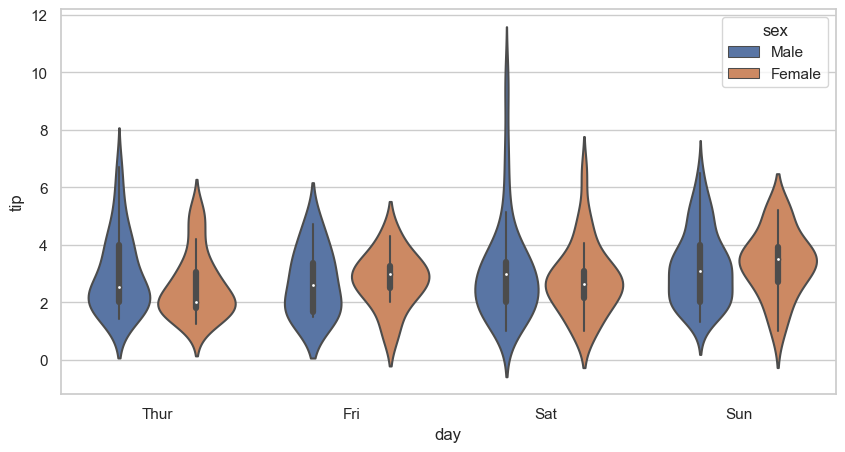

In [57]:
plt.subplots(figsize = (10,5))

sns.violinplot(y = "tip", x = "day", data = tips, hue = "sex");

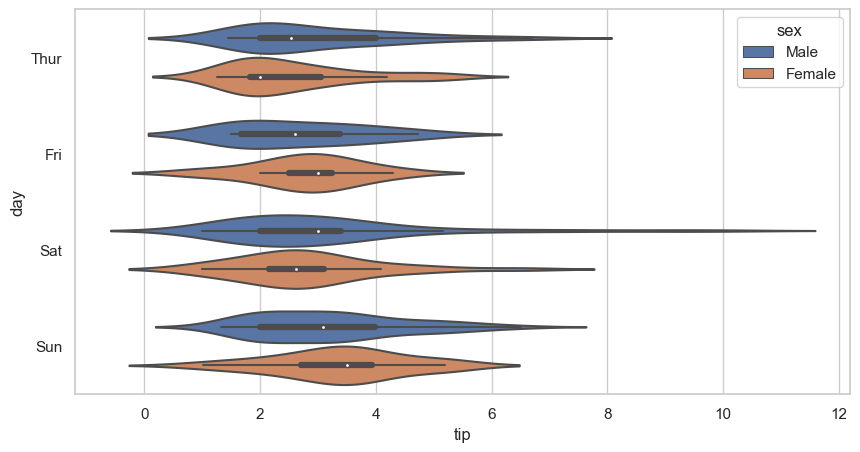

In [58]:
plt.subplots(figsize = (10,5))

sns.violinplot(x = "tip", y = "day", data = tips, hue = "sex");

In [ ]:
# yoğunluğun olduğu yerler daha iyi görünüyor gibi violinplotta

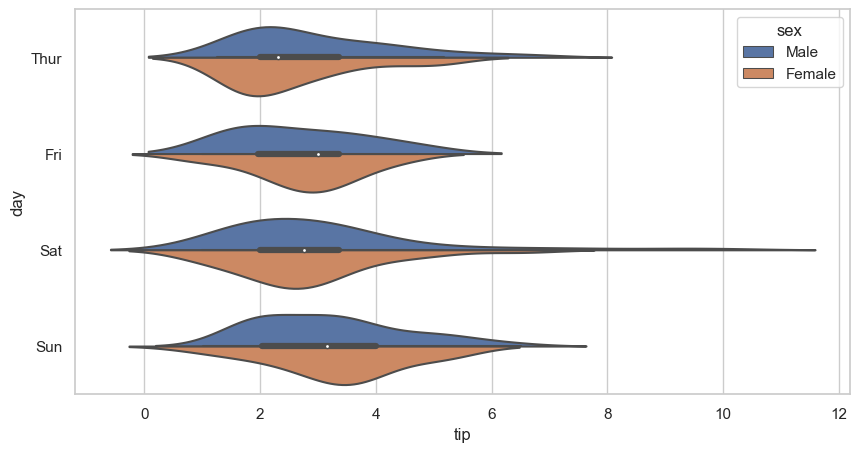

In [59]:
plt.subplots(figsize = (10,5))

sns.violinplot(x = "tip", y = "day", data = tips, hue = "sex", split = True);

# split = True ile güzelce bölmüş oldu

-Şişkinliğin olduğu yerlerde yığılma var. ucunun sivri olması outlyer olduğunu gösteriyor. en üsstteki grafiğe göre erkeklerde uç    değerde tip ödemesi var. perşembe günü verilen tiplerde erkeklerin ortalaması kadınların ortalamasından daha yüksek olduğu         görülüyor. Cuma günü kadınların ortalama tip ödemesi erkeklerin ödemesinden daha yüksek gerçekleşmiştir.

-Genel olarak cuma günü erkek ve kadınlarda yüksek değerli outlier lar daha az.

-Cumartesi outlyer sayısı bariz şekilde artmış. özellikle erkeklerde artış olmuş.

-Beyaz noktalar grubun (erkek+kadın) median değerini gösteriyor.



## Swarm Plot

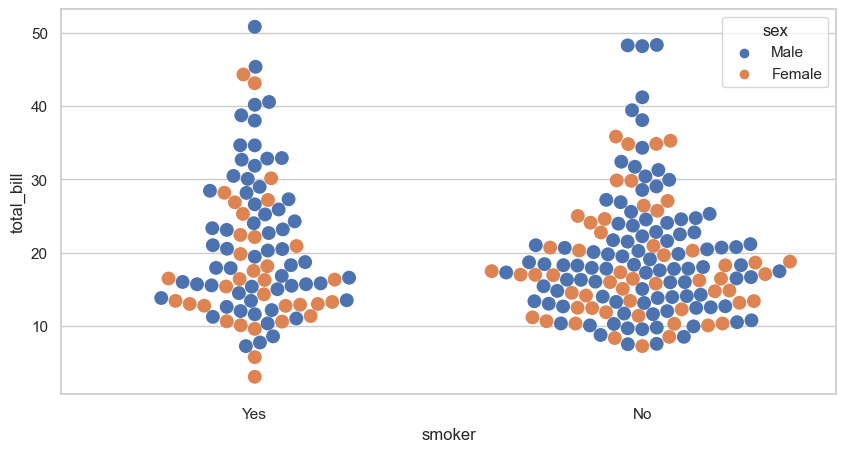

In [93]:
plt.figure(figsize = (10,5))
sns.swarmplot(y = "total_bill", data = tips, size = 10, x = "smoker", hue = "sex");

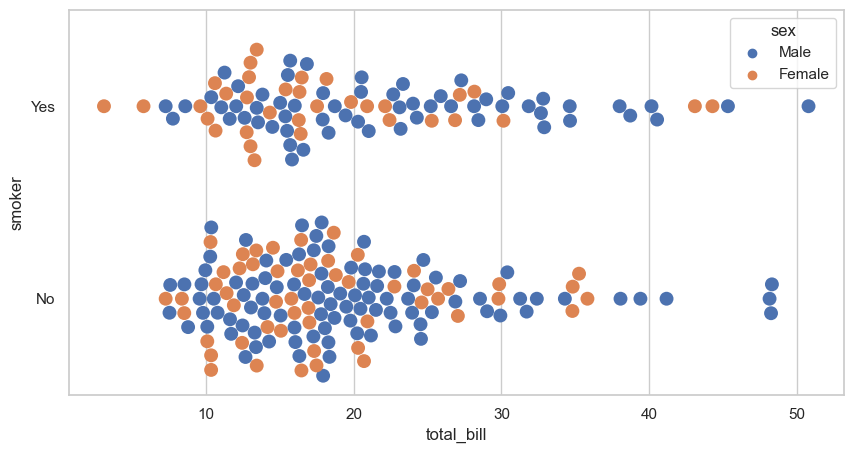

In [61]:
plt.figure(figsize = (10,5))

sns.swarmplot(x = "total_bill", data = tips, size = 10, y = "smoker", hue = "sex");

## Comparision Plot (Karsilastirma)

## joint plot

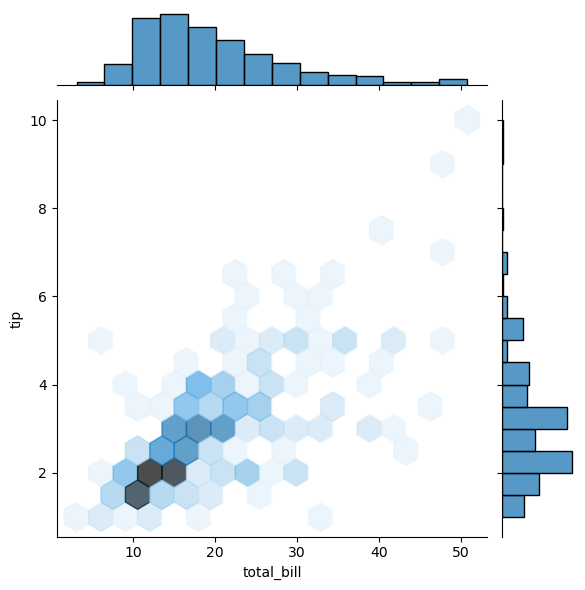

In [7]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "hex", alpha = 0.7);
# kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } bu grafik turlerini kullanbiliyoruz
# birden fazla grafik turunu ayni grafik icerinde gosteriyor

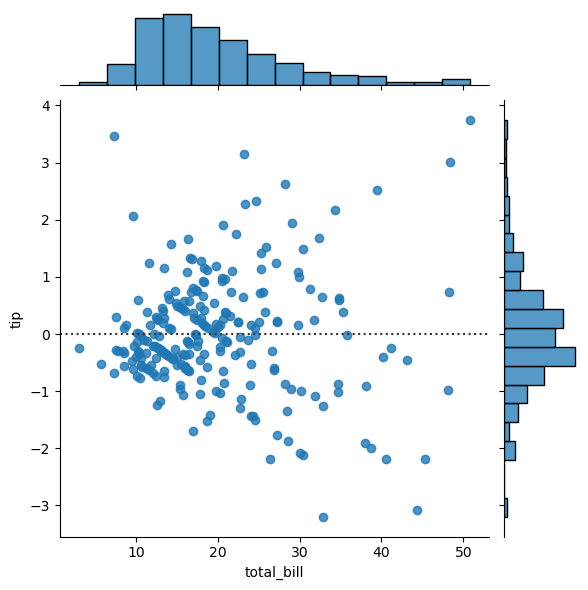

In [8]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "resid");
# kind = "resid" kullandigimizda alpha= parametresi kullnilmiyor
# resid best fit line a olan uzakligi gosterir

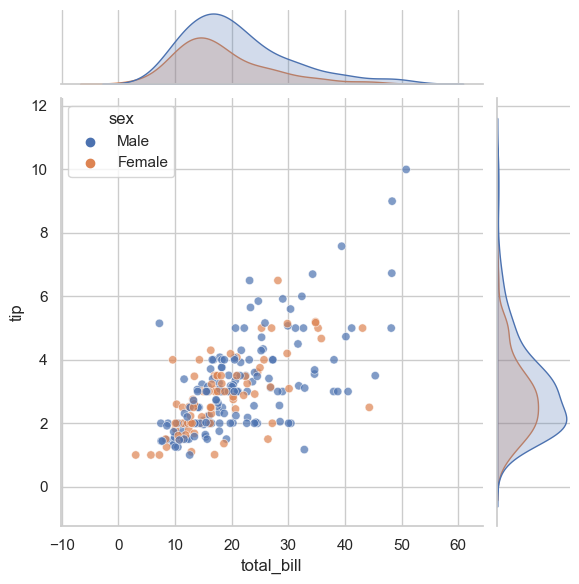

In [94]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="scatter", alpha=0.7, hue="sex");

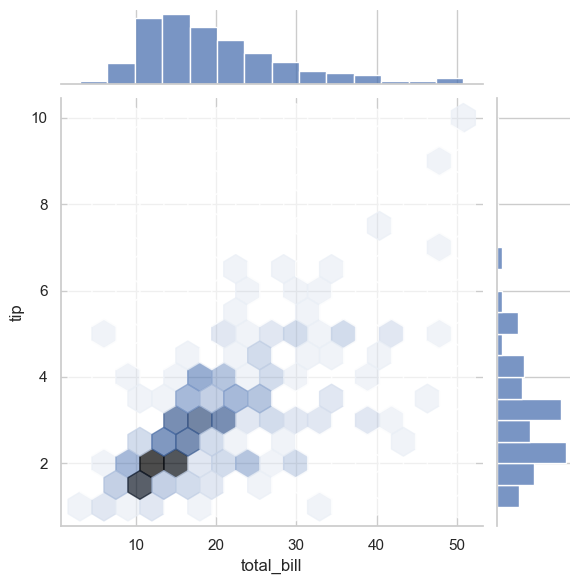

In [64]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "hex", alpha = 0.7);

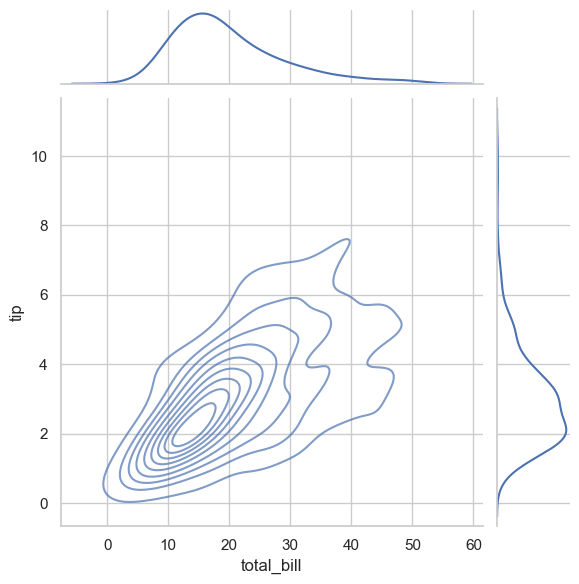

In [96]:
sns.jointplot(data = tips, x = "total_bill", y = "tip", kind = "kde", alpha = 0.7);

## pair plot
Varsayılan olarak bu fonksiyon, verilerdeki her sayısal değişkenin y eksenleri boyunca tek bir satırda ve x eksenleri boyunca tek bir sütunda paylaşılacağı şekilde bir Eksenler ızgarası oluşturacaktır. Diyagonal grafikler farklı şekilde ele alınır: her sütundaki verilerin marjinal dağılımını göstermek için tek değişkenli bir dağılım grafiği çizilir.

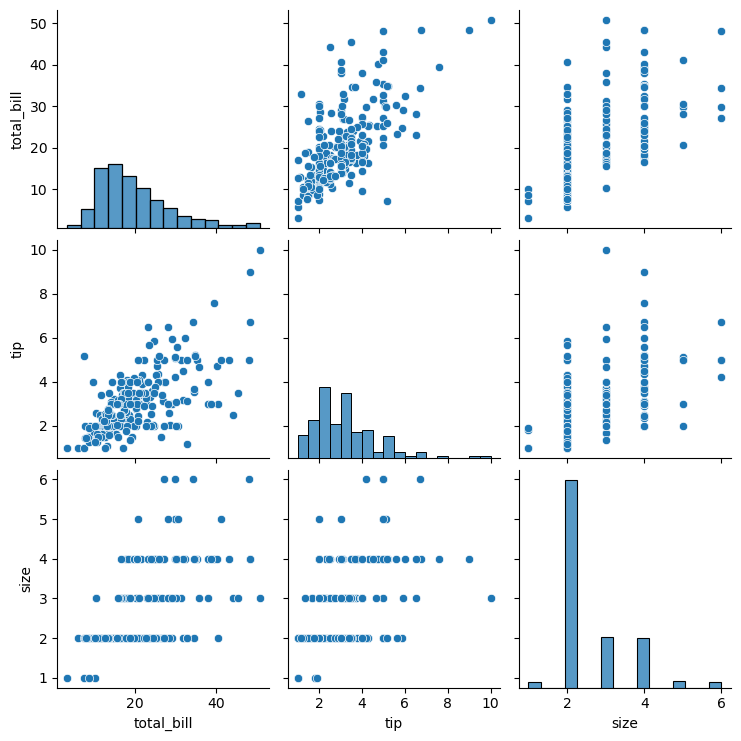

In [9]:
# icine verilen data nin sayisal columnlari birbiriyle karsilasyiriyor pair plot
sns.pairplot(tips);
# korelasyonu 1 cikan noktalarda diagonal olarak histogram yapar
# yani total_bill total_bill kesiminde, size in size ile olan kesiminde histogram var

In [18]:
penguin = sns.load_dataset("penguins")
penguin.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


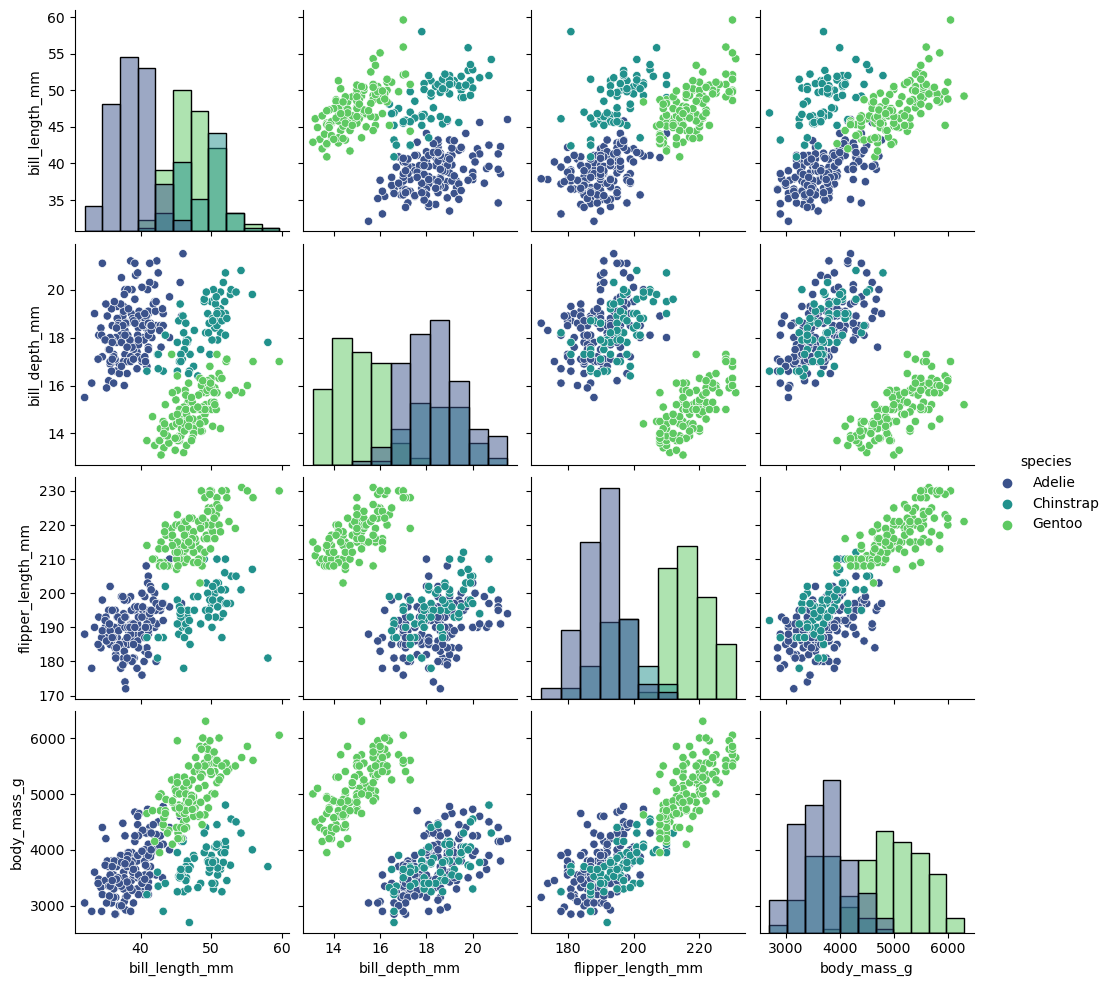

In [15]:
sns.pairplot(penguin, palette = "viridis", hue="species", diag_kind = "hist");

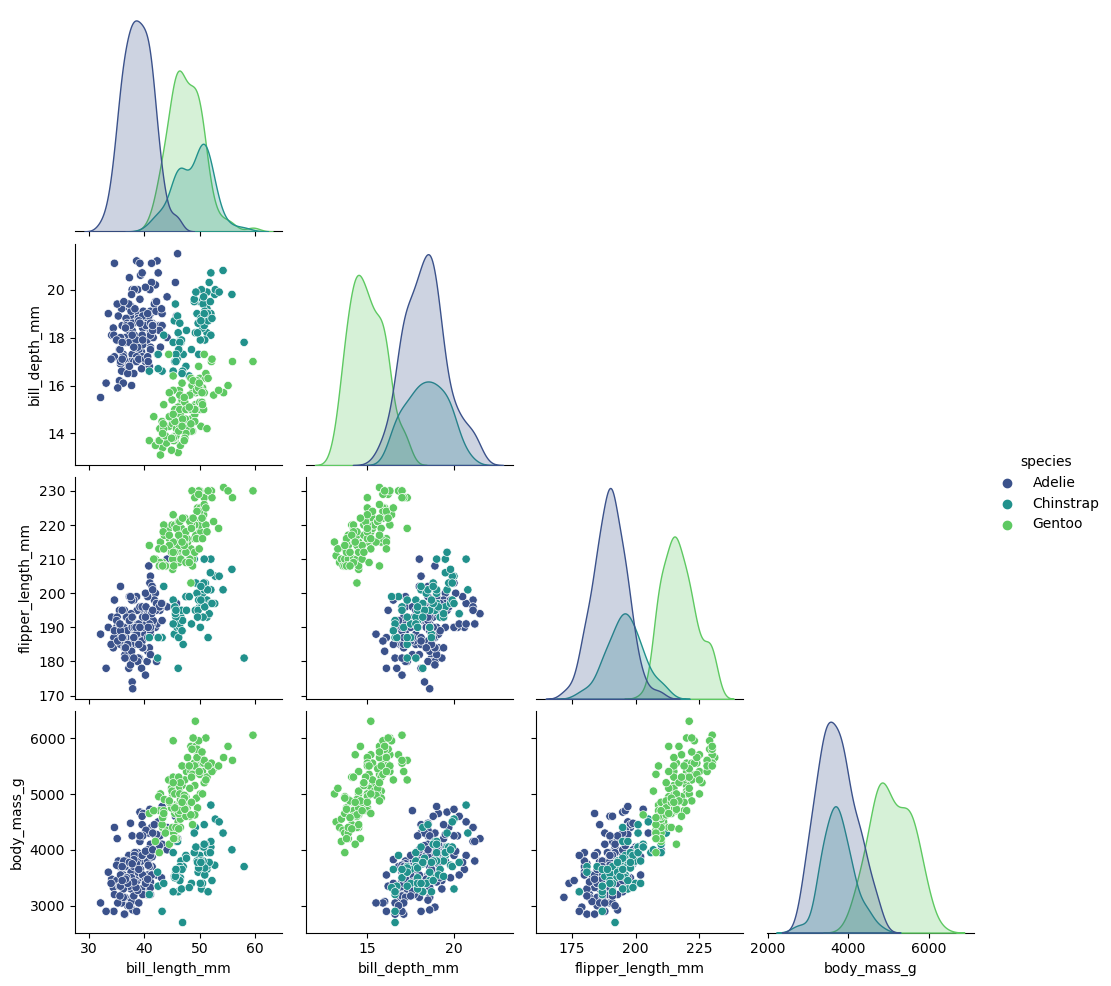

In [17]:
sns.pairplot(penguin, palette = "viridis", hue="species", corner = True);
# corner = True yaptigimizda birbiri ile ayni olan grafikleri getirmiyor

sns.pairplot(df, palette = "viridis", hue="species", diag_kind = "hist");
sns.pairplot(df, palette = "viridis", hue="species", kind = "hist");
boyle diyince histogramin yukaridan gorunusunu verdi.
sns.pairplot(df, palette = "viridis", hue="species", corner=True);
Corner=True dedigimde, azaltti
Viridis rengi bize gecis noktalarinda ne ifade ediyor o acidan avantaj sagliyor.

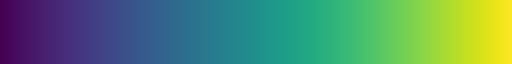

In [23]:
sns.color_palette("viridis", as_cmap = True) ## renk kodunun geçişleri hakkında bilgi verir.

## Facet Grid

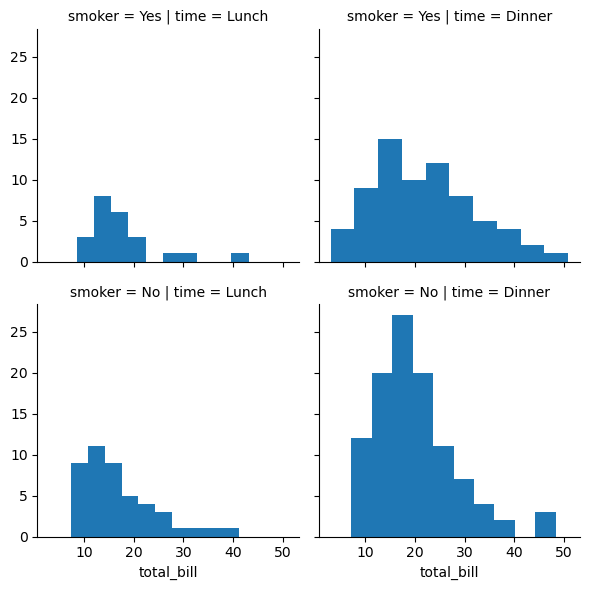

In [21]:
g = sns.FacetGrid( tips, col = "time", row = "smoker")
g = g.map(plt.hist, "total_bill");

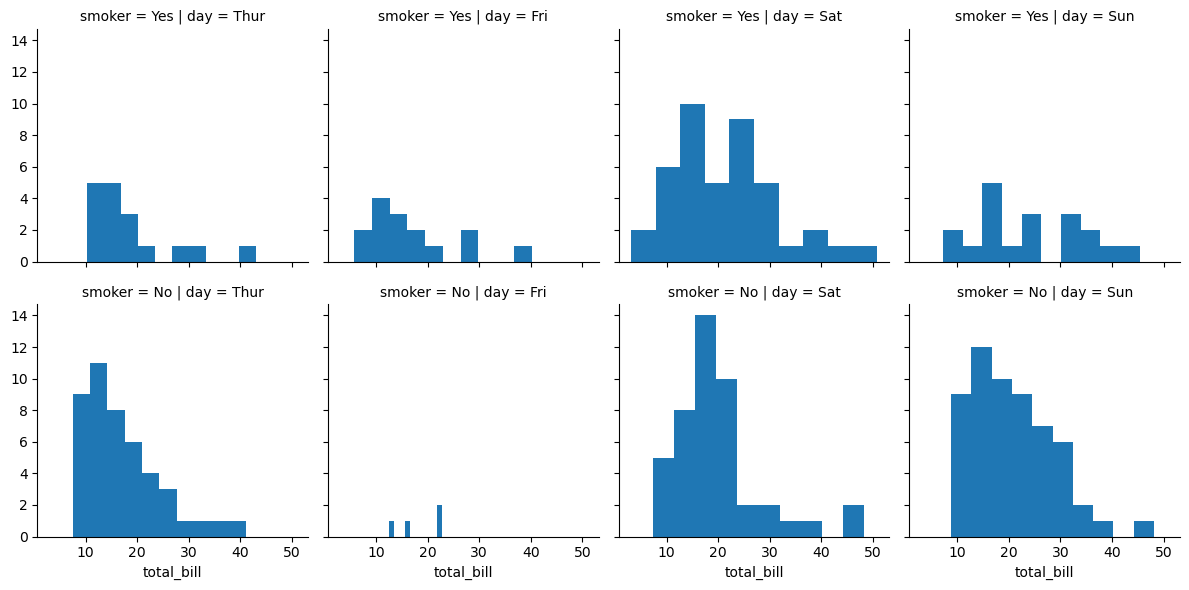

In [22]:
g = sns.FacetGrid( tips, col = "day", row = "smoker")
g = g.map(plt.hist, "total_bill");

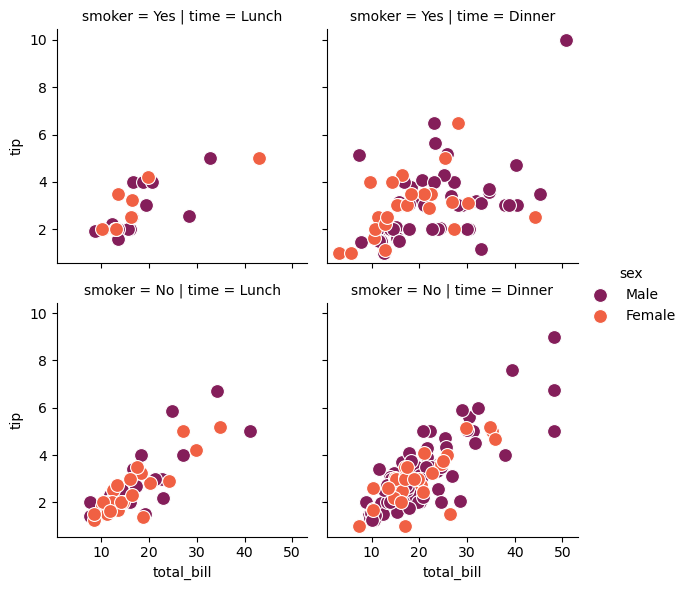

In [24]:
g = sns.FacetGrid(tips, col = "time", row = "smoker", hue = "sex", palette = "rocket")
g = g.map(sns.scatterplot, "total_bill", "tip", s = 100)#s=100 scatter plot daki circle lar buyuklugu nu ayarliyor
g = g.add_legend();

## Headmap
Dikdörtgen verileri renk kodlu bir matris olarak çizin.
Bu, Eksen düzeyinde bir fonksiyondur ve ax bağımsız değişkenine hiçbiri sağlanmamışsa ısı haritasını o anda etkin olan Eksenlere çizecektir. cbar False değilse veya cbar_ax'a ayrı bir Eksen verilmemişse, bu Eksen alanının bir kısmı alınır ve bir renk haritası çizmek için kullanılır.

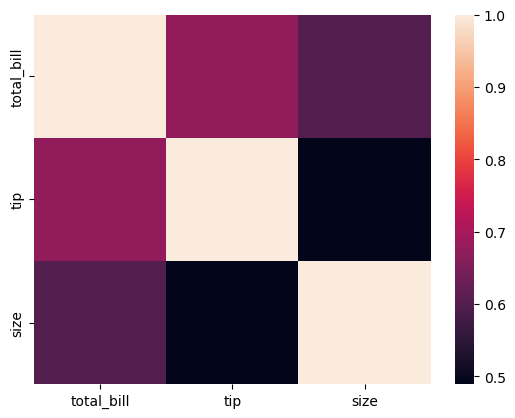

In [28]:
sns.heatmap(tips.corr()); # ozellikle ML ve DL de data kolelasyona bakmak icin kullnilmakta

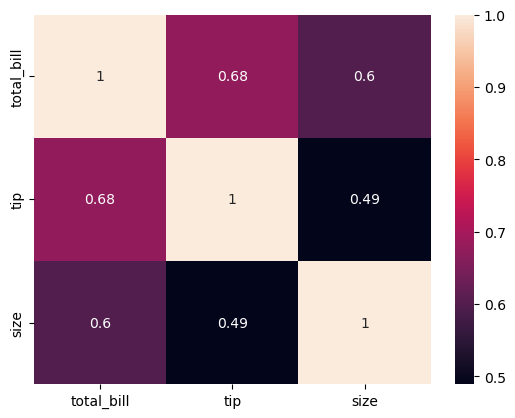

In [29]:
sns.heatmap(tips.corr(), annot = True); 
# en buyuk korelasyon tip ile total_bill arasinda varmis, diagonaller sayilmaz

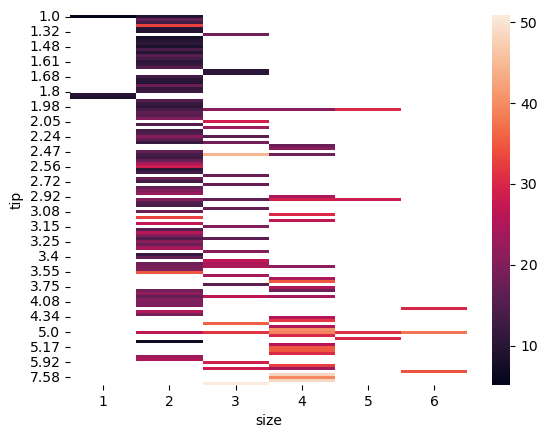

In [30]:
sns.heatmap(tips.pivot_table("total_bill", "tip", "size"));

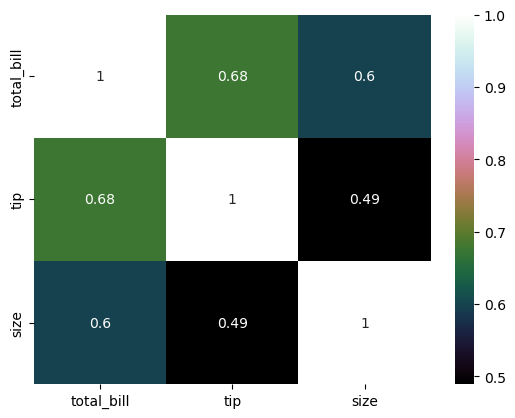

In [31]:
sns.heatmap(tips.corr(), annot=True, cmap="cubehelix");


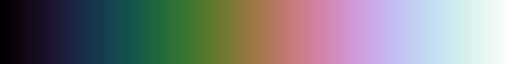

In [33]:
sns.color_palette("cubehelix", as_cmap = True);

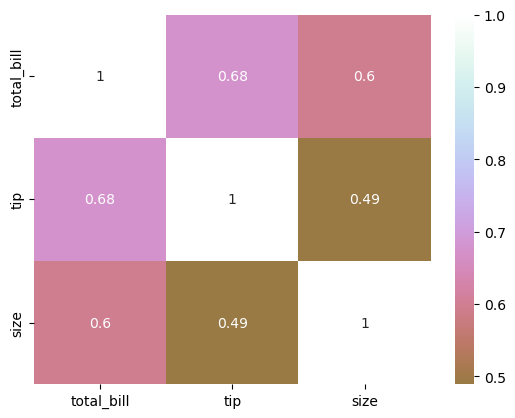

In [34]:
sns.heatmap(tips.corr(), annot=True, cmap="cubehelix", center = 0.5);
# cmap="cubehelix" renk paleti secmemizi sagliyor
# center = 0.5 parametresi yukaridaki renk paleti icinde saga sola dogru ilerletip renk gecislerini sagliyor

## Clustarmap
Siniflandirma yapiyor

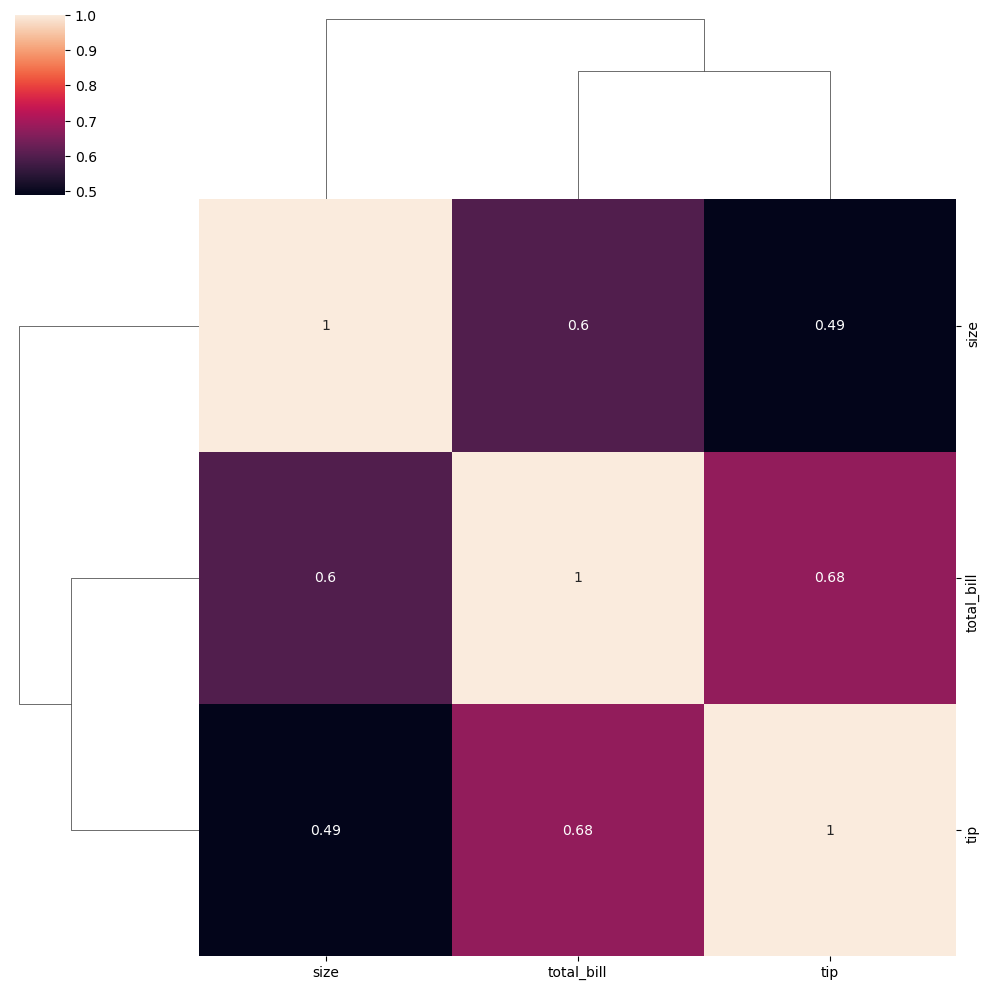

In [35]:
sns.clustermap(tips.corr(), annot = True);

In [37]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


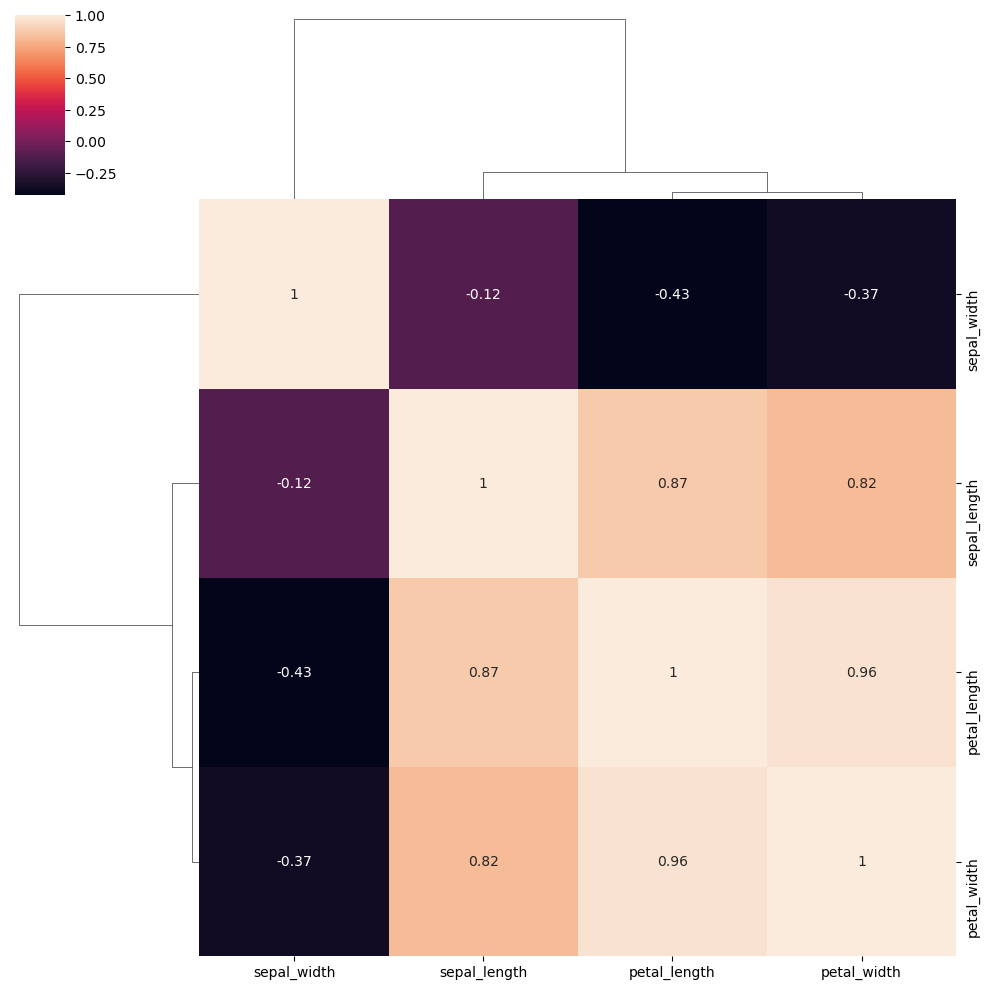

In [38]:
sns.clustermap(iris.corr(), annot = True);

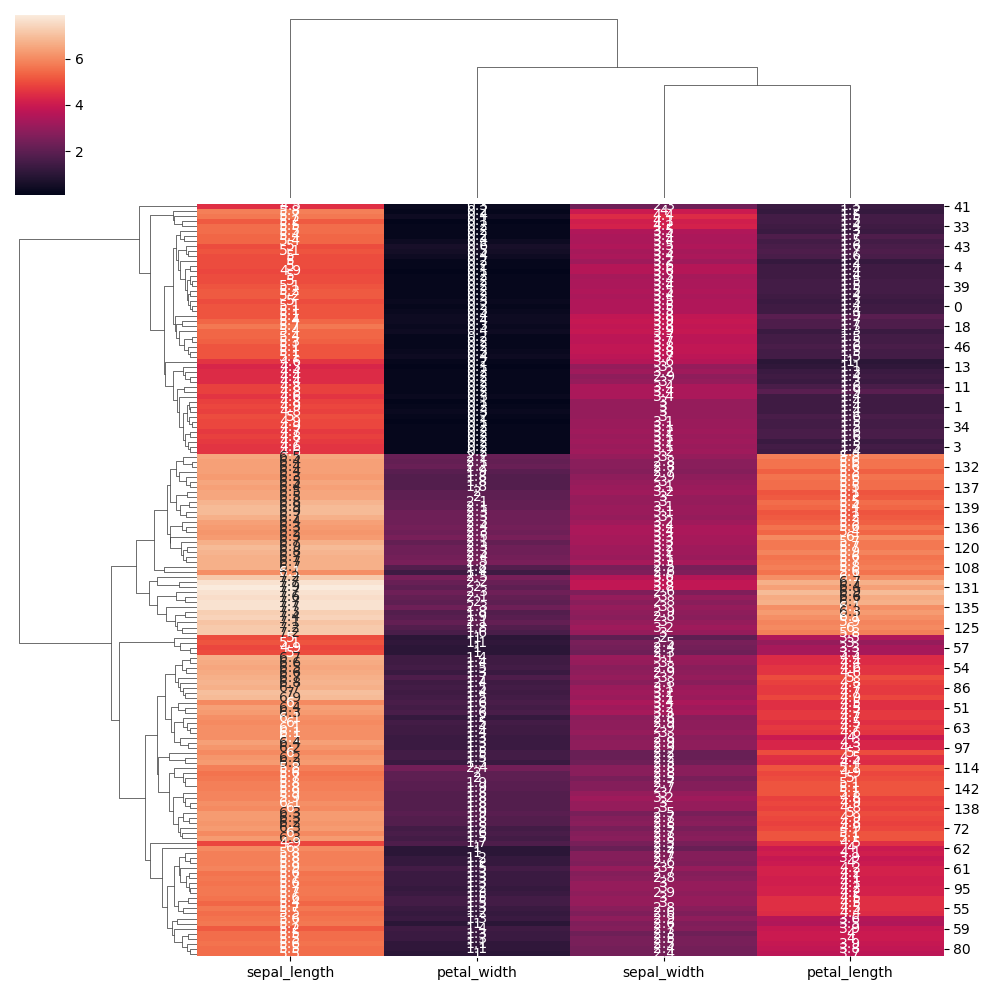

In [39]:
species = iris.pop("species")
sns.clustermap(iris,annot = True);